# Setups

## Download Projects and Dependencies

In [1]:
!sudo apt install git-lfs
!git clone https://github.com/MMintLab/VIRDO.git

!pip install open3d==0.14.1
!pip install torch==1.10.0+cu111
!pip install plyfile==0.7.4
!python -m pip install git+https://github.com/krrish94/chamferdist.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (3,308 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 155455 files and directories c

  Cloning https://github.com/krrish94/chamferdist.git to /tmp/pip-req-build-ebkou5b3
  Running command git clone -q https://github.com/krrish94/chamferdist.git /tmp/pip-req-build-ebkou5b3
  Created wheel for chamferdist: filename=chamferdist-1.0.0-cp37-cp37m-linux_x86_64.whl size=7188751 sha256=c439add4700276e0f3e2d0b865c90b8068a21b1909179e57db8c9a457eb5187d
  Stored in directory: /tmp/pip-ephem-wheel-cache-xltwbck9/wheels/f5/26/f5/dba0a210a1c22300c32760c967b180ccdb5a96f7a7e7fc39e2
Successfully built chamferdist


In [2]:
import os
os.chdir('VIRDO')
!git checkout working
!git lfs pull

Branch 'working' set up to track remote branch 'working' from 'origin'.
Switched to a new branch 'working'


## Download Data/Pretrained models

In [3]:
os.chdir('data')
!curl https://www.dropbox.com/sh/1q4o86az3sj6xgr/AAD325-PcxYKV7FKAEBI1QoLa?dl=0 -L -O -J
!unzip -o data.zip virdo_simul_dataset.pickle

os.chdir('../pretrained_model')
!curl https://www.dropbox.com/sh/s1r9gxd9dz4wdkk/AADK6mHvrPtFYo_xD4EmZZdda?dl=0 -L -O -J
!unzip -o pretrained_model.zip
os.chdir('..')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   151    0   151    0     0   1143      0 --:--:-- --:--:-- --:--:--  1143
100   276  100   276    0     0    342      0 --:--:-- --:--:-- --:--:--     0
100  162M  100  162M    0     0  32.2M      0  0:00:05  0:00:05 --:--:-- 46.2M
curl: Saved to filename 'data.zip'
Archive:  data.zip
 extracting: virdo_simul_dataset.pickle  
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   151    0   151    0     0    898      0 --:--:-- --:--:-- --:--:--   893
100   276  100   276    0     0    366      0 --:--:-- --:--:-- --:--:--   366
100 1326M  100 1326M    0     0   108M      0  0:00:12  0:00:12 --:--:--  122M
curl: Saved to filename 'pretrained_model.zip'
Archive:  pretrained_model.zip
mapname:  conversion of  failed
 ext

# Load Training Data

In [4]:
import sys, torch, random
from torch.utils.data import DataLoader
from importlib import reload

## Directories
root_path = os.getcwd()
model_directory = os.path.join(root_path, 'pretrained_model')
sys.path.append(root_path)

DEVICE = 'cuda'

In [5]:
import pickle
with open('data/virdo_simul_dataset.pickle', 'rb') as f:
  data_dict = pickle.load(f)

In [6]:
### Pair Shape code and Force code
import open3d as o3d
import numpy as np
pairs = {}
data = data_dict['train']
for shape_idx in data: 
    pairs[shape_idx] = []
    for deform_idx in data[shape_idx]:
        if deform_idx != 'nominal':
            pcd_name = f'contact_{shape_idx}_{deform_idx}.ply'
            contact_pcd = o3d.geometry.PointCloud()
            contact_pcd_ = np.array(data[shape_idx][deform_idx]['contact']).reshape(-1,3)
            contact_pcd.points = o3d.utility.Vector3dVector(contact_pcd_ )
            o3d.io.write_point_cloud(pcd_name, contact_pcd)
            pairs[shape_idx].append(deform_idx)
print(pairs)

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 1: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 2: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], 3: [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], 4: [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 5: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]}


# Reconstruction

In [9]:
reload(modules)

<module 'modules' from '/content/VIRDO/modules.py'>

In [10]:
import modules, diff_operators, meta_modules

## Load logs 
force_module_log = torch.load(os.path.join(model_directory, f'force_final.pth'),map_location=torch.device('cpu'))
object_module_log = torch.load(os.path.join(model_directory,f'shape_final.pth'),map_location=torch.device('cpu'))
deform_module_log = torch.load(os.path.join(model_directory,f'deform_final.pth'), map_location=torch.device('cpu'))


## Object Codes 
object_code_weight = object_module_log['shape_embedding'] # tensor [object num x object code_size]
object_code = torch.nn.Embedding.from_pretrained(object_code_weight).float().to(DEVICE)
object_code_size = object_code_weight.shape[1]


## Object Module form pretrained
object_module_weight = object_module_log['shape_model']
object_module = meta_modules.hypo_deformation(in_features= 3, out_features= 1,latent_dim = object_code_size)

object_module.load_state_dict(object_module_weight)
object_module.to(DEVICE )
object_module.eval()


## Deformation Codes & Contact Features
feats = force_module_log['feats']
force_code_weight = feats['f_emb']
cnt_ft = feats['cnt_ft']
deformation_code_size = force_code_weight[2].size()[1]


## Deformation Module form pretrained
deformation_module_weight = deform_module_log['deform_model']
deformation_module = meta_modules.hypo_deformation(in_features= 3, out_features= 3,
                                           latent_dim = deformation_code_size + object_code_size)

deformation_module.load_state_dict(deformation_module_weight)
deformation_module.to(DEVICE )
deformation_module

classifier_model = modules.PointNetCls(d_cnt_code = 4, d_force_emb = deformation_code_size ).to(DEVICE)
# classifier_model = modules.PointNetCls(k = deformation_code_size).to(DEVICE)
classifier_model.load_state_dict(force_module_log['force_model'])


SingleBVPNet(
  (net): FCBlock(
    (net): MetaSequential(
      (0): MetaSequential(
        (0): BatchLinear(in_features=3, out_features=256, bias=True)
        (1): ReLU(inplace=True)
      )
      (1): MetaSequential(
        (0): BatchLinear(in_features=256, out_features=256, bias=True)
        (1): ReLU(inplace=True)
      )
      (2): MetaSequential(
        (0): BatchLinear(in_features=256, out_features=256, bias=True)
        (1): ReLU(inplace=True)
      )
      (3): MetaSequential(
        (0): BatchLinear(in_features=256, out_features=1, bias=True)
      )
    )
  )
)
hypo_deformation(
  (hypo_net): SingleBVPNet(
    (net): FCBlock(
      (net): MetaSequential(
        (0): MetaSequential(
          (0): BatchLinear(in_features=3, out_features=256, bias=True)
          (1): ReLU(inplace=True)
        )
        (1): MetaSequential(
          (0): BatchLinear(in_features=256, out_features=256, bias=True)
          (1): ReLU(inplace=True)
        )
        (2): MetaSequential(

<All keys matched successfully>

# Fig6 : Cross section of x-z plane of the 3D space

In [11]:
class Decoder(torch.nn.Module):
    def __init__(self,shape_model, deform_model, shape_embedding, deform_embedding, device):
        super().__init__()
        self.shape_embedding = shape_embedding.to(device)
        self.deform_embedding = deform_embedding.to(device)
        self.shape_model = shape_model.to(device)
        self.deform_model = deform_model.to(device)
        self.device = device

    def forward(self, coords, type = 'deformed'):
  
        deform_input={'coords':coords, 'embedding':torch.cat([self.deform_embedding,self.shape_embedding],dim=-1)}
        deform_output = self.deform_model(deform_input)
        
       ### [x,y,z] = deform_input['coords']= deform_output['model_in'] -> shape_input['coords']    
       ### [x',y',z'] = [x,y,z] + [a,b,c] (deformation)  
        shape_input = {'coords': deform_output['model_in'],
                    'model_out' :deform_output['model_in'] + deform_output['model_out'],
                    'embedding' : self.shape_embedding}
        
        sdf_deformed = self.shape_model(shape_input)['model_out']


        ### nominal shape = zero deformation case = when "[a,b,c] = [0,0,0]"
        shape_input = {'coords': deform_output['model_in'],
                'model_out' :deform_output['model_in'],
                'embedding' : self.shape_embedding}
        
        sdf_nominal = self.shape_model(shape_input)['model_out']
        deformation_field = torch.norm(deform_output['model_out'], dim = -1)

        return sdf_deformed.detach().cpu(), sdf_nominal.detach().cpu(), deformation_field.detach().cpu()
    


In [12]:
emb_s = object_code_weight[5].unsqueeze(0)
emb_d = force_code_weight[120]

resolution = 150
model = Decoder(object_module, deformation_module, emb_s, emb_d, DEVICE)
qr = np.linspace(-1, 1, num=150)

map_deformed = np.zeros((150,150))
map_nominal = np.zeros((150,150))
map_deformation_field = np.zeros((150,150))

input = []
i_idx = []
j_idx = []
for iidx, i in enumerate(qr):
    for jidx, j in enumerate(qr):
        input.append([i,0,j])
        i_idx.append (resolution-jidx-1)
        j_idx.append (iidx)

sdf_deformed, sdf_nominal, deformation_field = model(torch.tensor(input).float().cuda())
map_deformed[i_idx,j_idx] = sdf_deformed.squeeze()
map_nominal[i_idx,j_idx] =  sdf_nominal.squeeze()
map_deformation_field[i_idx,j_idx] = deformation_field.squeeze()


Text(946.764705882353, 0.5, 'Z-axis')

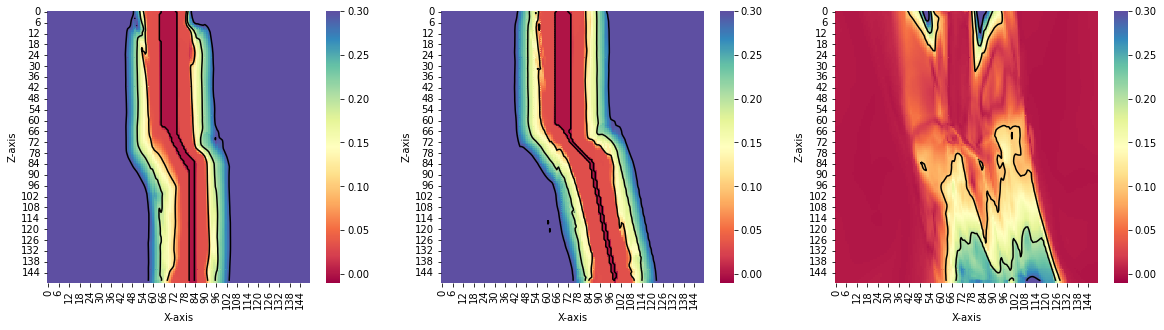

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.contour(map_nominal, [0,0.1,0.2,0.3], colors='black')
ax = sns.heatmap(map_nominal, cmap="Spectral", vmin=-0.01, vmax=0.3)

plt.xlabel('X-axis')
plt.ylabel('Z-axis')


plt.subplot(1,3,2)
plt.contour(map_deformed, [0,0.1,0.2,0.3], colors='black')
ax = sns.heatmap(map_deformed, cmap="Spectral", vmin=-0.01, vmax=0.3)
plt.xlabel('X-axis')
plt.ylabel('Z-axis')

plt.subplot(1,3,3)
plt.contour(map_deformation_field, [0,0.1,0.2,0.3], colors='black')
ax = sns.heatmap(map_deformation_field, cmap="Spectral", vmin=-0.01, vmax=0.3)
plt.xlabel('X-axis')
plt.ylabel('Z-axis')

# Tab1: Learning Accuracy

In [ ]:
## Define Dataset - either 'train' or 'test
data = data_dict["train"] # 'test'

## Tab1-a)Nominal Shape - Chamfer Distance

In [ ]:
## Undeformed Decoder
class Nominal_Decoder(torch.nn.Module):
    def __init__(self,shape_model,shape_embedding,device):
        super().__init__()

        self.shape_embedding = shape_embedding.to(device)
        self.shape_model = shape_model.to(device)
    def forward(self, coords):
        
        shape_input = {'coords':coords.unsqueeze(0),'embedding': self.shape_embedding}
        pred_sdf = self.shape_model(shape_input)

        return pred_sdf

sampling takes: 17.653507


/content/VIRDO/sdf_meshing.py:115: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  numpy_3d_sdf_tensor, level=0.0, spacing=[voxel_size] * 3


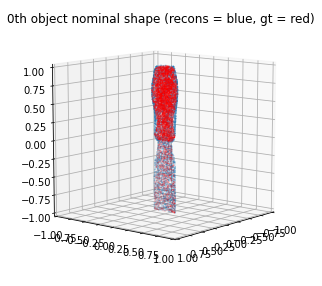

sampling takes: 17.295907


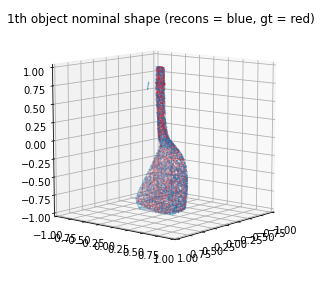

sampling takes: 17.262474


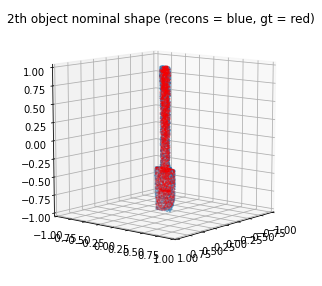

sampling takes: 17.222430


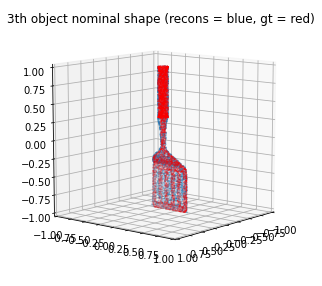

sampling takes: 17.296072


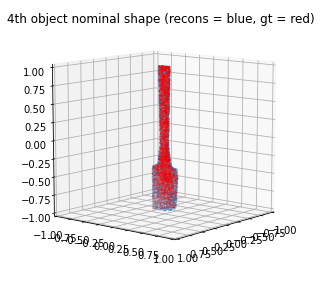

sampling takes: 17.268703


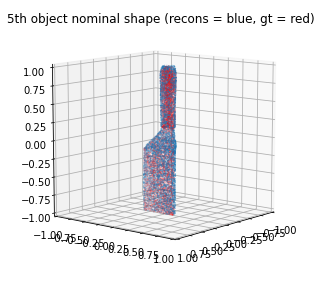

Average CD : 0.0005433812098843711


In [ ]:
# from pytorch3d.loss import chamfer_distance
import matplotlib.pyplot as plt
from sdf_meshing import create_mesh
from chamferdist import ChamferDistance
chamferDist = ChamferDistance()

np.random.seed(300)
random.seed(300)
# torch.manual_seed(300)
# torch.cuda.manual_seed(300)
# torch.cuda.manual_seed_all(300)

dist_lst = []
n = 5600

for shape_idx in range ( len(data) ): ## YS    
    for deform_idx in data[shape_idx].keys():
        if deform_idx != "nominal":
            continue
            
        data_i = data[shape_idx][deform_idx]
        object_emb = object_code_weight[shape_idx]

        decoder = Nominal_Decoder(object_module, object_emb.unsqueeze(0), DEVICE)
        source_cloud = create_mesh(decoder, filename=None, N= 400, output_return = True, verbose = False)

        # Random Select pointclouds to have the length
        iidx = np.random.permutation(source_cloud.shape[0])[:n]
        source_cloud = source_cloud[iidx,:]
        source_cloud = torch.tensor(source_cloud).unsqueeze(0).float()

        
        target_cloud = data_i['coords'][:,np.where(data_i['gt']==0)[1],:].detach()
        iidx = np.random.permutation(target_cloud.size()[1])[:n]
        target_cloud = target_cloud[:,iidx,:]

        # Chamfer distance
        dist = chamferDist(target_cloud, source_cloud)

        dist_lst.append(dist.cpu().numpy()/n)
        plt.figure(figsize=(5,5))

        ax = plt.axes(projection='3d')
        ax.axis("on")
        plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

        ax.scatter(source_cloud[:,:,0],source_cloud[:,:,1],source_cloud[:,:,2], s=0.04)
        ax.scatter(target_cloud[:,:,0],target_cloud[:,:,1],target_cloud[:,:,2], s=0.03, c='red')
        ax.set_xlim3d(-1,1)
        ax.set_ylim3d(-1,1)
        ax.set_zlim3d(-1,1)
        ax.grid()
        ax.view_init(10, 40)
        plt.title(f'{shape_idx}th object nominal shape (recons = blue, gt = red)')
        plt.show()
print( "Average CD :", np.mean(dist_lst))   

## Tab1-b)Deformed Shape - Chamfer Distance

In [ ]:
class Deform_Decoder(torch.nn.Module):
    def __init__(self,shape_model, deform_model, shape_embedding, deform_embedding, device):
        super().__init__()
        self.device = device
        self.shape_embedding = shape_embedding.to(device)
        self.deform_embedding = deform_embedding.to(device)
        self.shape_model = shape_model.to(device)
        self.deform_model = deform_model.to(device)

    def forward(self, coords, type = 'deformed'):
  
        deform_input={'coords':coords, 
                      'embedding':torch.cat([self.deform_embedding,self.shape_embedding],dim=-1)}
        deform_output = self.deform_model(deform_input)

        shape_input = {'coords': deform_output['model_in'].to(self.device),
                    'model_out' :deform_output['model_in'].to(self.device) + deform_output['model_out'],
                    'embedding' : self.shape_embedding}
        
        pred_sdf = self.shape_model(shape_input)
        return pred_sdf
    
    

In [ ]:
dist_lst = []
dist_lst_real = []
n = 5600

np.random.seed(300)
random.seed(300)

for shape_idx in range ( len(data) ): ## YS    
    for deform_idx in data[shape_idx].keys():
        if deform_idx == "nominal":
            continue
        
        # Print every 4 scenes. Evaluating the entire dataset costs ~ 1hr.
        if deform_idx % 10 :
          continue

        data_i = data[shape_idx][deform_idx]
        shape_emb = object_code_weight[shape_idx]
        force_emb = force_code_weight[deform_idx]

        decoder = Deform_Decoder(object_module, deformation_module, shape_emb.unsqueeze(0), force_emb, DEVICE)

        source_cloud = source_cloud = create_mesh(decoder, filename=None, N= 400, output_return = True, verbose = False)
        # Random Select pointclouds to have the length
        iidx = np.random.permutation(source_cloud.shape[0])[:n]
        source_cloud = source_cloud[iidx,:]
        source_cloud = torch.tensor(source_cloud).unsqueeze(0).float()
        

        
        target_cloud = data_i['coords'][:,np.where(data_i['gt']==0)[1],:].detach()
        iidx = np.random.permutation(target_cloud.size()[1])[:n]
        target_cloud = target_cloud[:,iidx,:]


        dist= chamferDist(target_cloud, source_cloud) 
        dist_lst.append(dist.cpu().numpy()/n)

        plt.figure(figsize=(5,5))
        ax = plt.axes(projection='3d')
        ax.axis("on")
        plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

        ax.scatter(source_cloud[:,:,0],source_cloud[:,:,1],source_cloud[:,:,2], s=0.04)
        ax.scatter(target_cloud[:,:,0],target_cloud[:,:,1],target_cloud[:,:,2], s=0.03, c='red')
        ax.set_xlim3d(-1,1)
        ax.set_ylim3d(-1,1)
        ax.set_zlim3d(-1,1)
        ax.grid()
        ax.view_init(10, 80)
        plt.title(f'{deform_idx}th deformed shape from {shape_idx}th object (recons = blue, gt = red)')
        plt.show()

print( "Average CD :", np.mean(dist_lst))

# Bonus Figure: Latent Space Composition

- Color Coding of each object

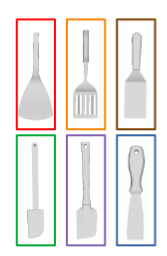

In [ ]:
!pip install plotly
!pip install umap-learn


**Task** : UMAP of Object codes

**Observation** : object codes exhibit significant separation.

In [ ]:
tot = []
label = []

for obj_idx, deform_idxs in pairs.items():
  tot.append(object_code_weight[obj_idx].unsqueeze(0))
  label.append(obj_idx)

tot = torch.cat(tot,dim=0)

import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(tot)
embedding.shape

import matplotlib.pyplot as plt
import seaborn as sns

# Latent Space of force code distribution 
plt.figure(figsize=(4, 4))
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in label], s = 10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of force codes', fontsize=12);



**Task** : UMAP of Force codes

**Observation** : Learned force codes are distributed according
to the bending direction (+x direction / -x direction)😯

In [ ]:
tot = []
label = []

for obj_idx, deform_idxs in pairs.items():
  for deform_idx in deform_idxs:
    tot.append(force_code_weight[deform_idx])
    label.append(obj_idx)

tot = torch.cat(tot,dim=0)

import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(tot)
embedding.shape

import matplotlib.pyplot as plt
import seaborn as sns

# Latent Space of force code distribution 
plt.figure(figsize=(4, 4))
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in label], s = 10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of force codes', fontsize=12);



**Task** : UMAP of [Force code, Shape code]. The concatenated set produces deformation field.

**Observation** : The model learns to cluster latent features by deformation properties (e.g. stiffness) that are
not directly observed or given as input 😯

In [ ]:

tot = []
label = []

for obj_idx, deform_idxs in pairs.items():
  for deform_idx in deform_idxs:
    tot.append( torch.cat([force_code_weight[deform_idx], object_code_weight[obj_idx].unsqueeze(0) ], dim = -1))
    label.append(obj_idx)

tot = torch.cat(tot,dim=0)

import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(tot)
embedding.shape

import matplotlib.pyplot as plt
import seaborn as sns

# Latent Space of force code distribution 
plt.figure(figsize=(4, 4))
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in label], s = 10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of [force codes, object code]', fontsize=12);